# Intro

Midterm project for ML Zoomcamp 2023 course

In this project I will build a ML model for binary classifation of student dropout rate

I have used a Student Dropout Analysis for School Education dataset
[Dataset info](https://www.kaggle.com/code/jeevabharathis/student-dropout-analysis-for-school-education)
[Details here](https://www.mdpi.com/2306-5729/7/11/146)


Assuming Graduate and Enrolled as success of education and dropout otherwise the primary goal of our model would be detection of students in the risk zone.
So I will treat target values of Graduate and Enrolled as 0 and Dropout as 1



## Initial import and reading the data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv("dataset\dataset.csv")


In [3]:
df

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,Graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,Dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,Dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,Graduate



# Initial data preparation



In [4]:
len(df)

4424

In [5]:
df.dtypes

Marital status                                      int64
Application mode                                    int64
Application order                                   int64
Course                                              int64
Daytime/evening attendance                          int64
Previous qualification                              int64
Nacionality                                         int64
Mother's qualification                              int64
Father's qualification                              int64
Mother's occupation                                 int64
Father's occupation                                 int64
Displaced                                           int64
Educational special needs                           int64
Debtor                                              int64
Tuition fees up to date                             int64
Gender                                              int64
Scholarship holder                                  int64
Age at enrollm

In [6]:
# making all necessary preparations

df.columns = df.columns.str.lower().str.replace(' ', '_')

string_columns = list(df.dtypes[df.dtypes == 'object'].index)

for col in string_columns:
    df[col] = df[col].str.lower().str.replace(' ', '_')

In [7]:
df

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,nacionality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,graduate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,graduate
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,dropout
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,dropout
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,graduate


In [8]:
df['dropout']=(df.target=='dropout').astype(int)

In [9]:
df

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,nacionality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,target,dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0.000000,0,10.8,1.4,1.74,dropout,1
1,1,6,1,11,1,1,1,1,3,4,...,6,6,6,13.666667,0,13.9,-0.3,0.79,graduate,0
2,1,1,5,5,1,1,1,22,27,10,...,6,0,0,0.000000,0,10.8,1.4,1.74,dropout,1
3,1,8,2,15,1,1,1,23,27,6,...,6,10,5,12.400000,0,9.4,-0.8,-3.12,graduate,0
4,2,12,1,3,0,1,1,22,28,10,...,6,6,6,13.000000,0,13.9,-0.3,0.79,graduate,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,6,8,5,12.666667,0,15.5,2.8,-4.06,graduate,0
4420,1,1,2,15,1,1,19,1,1,10,...,6,6,2,11.000000,0,11.1,0.6,2.02,dropout,1
4421,1,1,1,12,1,1,1,22,27,10,...,8,9,1,13.500000,0,13.9,-0.3,0.79,dropout,1
4422,1,1,1,9,1,1,1,22,27,8,...,5,6,5,12.000000,0,9.4,-0.8,-3.12,graduate,0


In [10]:
df.dropout.value_counts()

dropout
0    3003
1    1421
Name: count, dtype: int64

In [11]:
data=df

In [12]:
data=data.drop(columns='target')

In [13]:
data

,marital_status,application_mode,application_order,course,daytime/evening_attendance,previous_qualification,nacionality,mother's_qualification,father's_qualification,mother's_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,dropout
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,1,1,6,15,1,1,1,1,1,6,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,1,1,2,15,1,1,19,1,1,10,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,1,1,1,12,1,1,1,22,27,10,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,1,1,1,9,1,1,1,22,27,8,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [14]:
data.rename(columns = {'nacionality':'nationality', 'age_at_enrollment':'age'}, inplace = True)
data.rename(columns={'daytime/evening_attendance':'daytime_or_evening_attendance',"mother's_qualification":"mother_qualification", "father's_qualification":"father_qualification",
       "mother's_occupation":"mother_occupation", "father's_occupation":"father_occupation"}, inplace=True )
data.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_or_evening_attendance', 'previous_qualification',
       'nationality', 'mother_qualification', 'father_qualification',
       'mother_occupation', 'father_occupation', 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_ra

In [15]:
data.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_or_evening_attendance', 'previous_qualification',
       'nationality', 'mother_qualification', 'father_qualification',
       'mother_occupation', 'father_occupation', 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_ra

## Filling the categorical fields

In [16]:
marital_status_values={
1:'Single',
2:'Married',
3:'Widower',
4:'Divorced',
5:'Facto union',
6:'Legally separated',}

data.marital_status=data.marital_status.map(marital_status_values)

nationality_values={1:'Portuguese',
2:'German',
3:'Spanish',
4:'Italian',
5:'Dutch',
6:'English',
7:'Lithuanian',
8:'Angolan',
9:'Cape Verdean',
10:'Guinean',
11:'Mozambican',
12:'Santomean',
13:'Turkish',
14:'Brazilian',
15:'Romanian',
16:'Moldova (Republic of)',
17:'Mexican',
18:'Ukrainian',
19:'Russian',
20:'Cuban',
21:'Colombian',
}
data.nationality=data.nationality.map(nationality_values)

application_mode_values={1:'1st phase-general contingent',
2:'Ordinance No. 612/93',
3:'1st phase-special contingent (Azores Island)',
4:'Holders of other higher courses',
5:'Ordinance No. 854-B/99',
6:'International student (bachelor)',
7:'1st phase-special contingent (Madeira Island)',
8:'2nd phase-general contingent',
9:'3rd phase-general contingent',
10:'Ordinance No. 533-A/99, item b2) (Different Plan)',
11:'Ordinance No. 533-A/99, item b3 (Other Institution)',
12:'Over 23 years old',
13:'Transfer',
14:'Change in course',
15:'Technological specialization diploma holders',
16:'Change in institution/course',
17:'Short cycle diploma holders',
18:'Change in institution/course (International)',
}

data.application_mode=data.application_mode.map(application_mode_values)

course_values=	{1:'Biofuel Production Technologies',
2:'Animation and Multimedia Design',
3:'Social Service (evening attendance)',
4:'Agronomy',
5:'Communication Design',
6:'Veterinary Nursing',
7:'Informatics Engineering',
8:'Equiniculture',
9:'Management',
10:'Social Service',
11:'Tourism',
12:'Nursing',
13:'Oral Hygiene',
14:'Advertising and Marketing Management',
15:'Journalism and Communication',
16:'Basic Education',
17:'Management (evening attendance)',
           }

data.course=data.course.map(course_values)


previous_qualification_values=	{1:'Secondary education',
2:'Higher education-bachelor’s degree',
3:'Higher education-degree',
4:'Higher education-master’s degree',
5:'Higher education-doctorate',
6:'Frequency of higher education',
7:'12th year of schooling-not completed',
8:'11th year of schooling-not completed',
9:'Other-11th year of schooling',
10:'10th year of schooling',
11:'10th year of schooling-not completed',
12:'Basic education 3rd cycle (9th/10th/11th year) or equivalent',
13:'Basic education 2nd cycle (6th/7th/8th year) or equivalent',
14:'Technological specialization course',
15:'Higher education-degree (1st cycle)',
16:'Professional higher technical course',
17:'Higher education-master’s degree (2nd cycle)',
}

data.previous_qualification=data.previous_qualification.map(previous_qualification_values)

parents_qualification_values={1:"Secondary Education-12th Year of Schooling or Equivalent",
2:"Higher Education-bachelor’s degree",
3:"Higher Education-degree",
4:"Higher Education-master’s degree",
5:"Higher Education-doctorate",
6:"Frequency of Higher Education",
7:"12th Year of Schooling:-not completed",
8:"11th Year of Schooling:-not completed",
9:"7th Year (Old)",
10:"Other-11th Year of Schooling",
11:"2nd year complementary high school course",
12:"10th Year of Schooling",
13:"General commerce course",
14:"Basic Education 3rd Cycle (9th/10th/11th Year) or Equivalent",
15:"Complementary High School Course",
16:"Technical-professional course",
17:"Complementary High School Course:-not concluded",
18:"7th year of schooling",
19:"2nd cycle of the general high school course",
20:"9th Year of Schooling-not completed",
21:"8th year of schooling",
22:"General Course of Administration and Commerce",
23:"Supplementary Accounting and Administration",
24:"Unknown",
25:"Cannot read or write",
26:"Can read without having a 4th year of schooling",
27:"Basic education 1st cycle (4th/5th year) or equivalent",
28:"Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent",
29:"Technological specialization course",
30:"Higher education-degree (1st cycle)",
31:"Specialized higher studies course",
32:"Professional higher technical course",
33:"Higher Education-master’s degree (2nd cycle)",
34:"Higher Education-doctorate (3rd cycle)",
}

data.mother_qualification=data.mother_qualification.map(parents_qualification_values)
data.father_qualification=data.father_qualification.map(parents_qualification_values)

gender_values={1:'male',
0:'female',
}
data.gender=data.gender.map(gender_values)


daytime_or_evening_attendance_attendance_values={1:'daytime',
0:'evening',
}

data.daytime_or_evening_attendance=data.daytime_or_evening_attendance.map(daytime_or_evening_attendance_attendance_values)


parents_occupation_values={
1:"Student",
2:"Representatives of the Legislative Power and Executive Bodies, Directors, Directors and Executive Managers",
3:"Specialists in Intellectual and Scientific Activities",
4:"Intermediate Level Technicians and Professions",
5:"Administrative staff",
6:"Personal Services, Security and Safety Workers, and Sellers",
7:"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",
8:"Skilled Workers in Industry, Construction, and Craftsmen",
9:"Installation and Machine Operators and Assembly Workers",
10:"Unskilled Workers",
11:"Armed Forces Professions",
12:"Other Situation",
13:"(blank)",
14:"Armed Forces Officers",
15:"Armed Forces Sergeants",
16:"Other Armed Forces personnel",
17:"Directors of administrative and commercial services",
18:"Hotel, catering, trade, and other services directors",
19:"Specialists in the physical sciences, mathematics, engineering, and related techniques",
20:"Health professionals",
21:"Teachers",
22:"Specialists in finance, accounting, administrative organization, and public and commercial relations",
23:"Intermediate level science and engineering technicians and professions",
24:"Technicians and professionals of intermediate level of health",
25:"Intermediate level technicians from legal, social, sports, cultural, and similar services",
26:"Information and communication technology technicians",
27:"Office workers, secretaries in general, and data processing operators",
28:"Data, accounting, statistical, financial services, and registry-related operators",
29:"Other administrative support staff",
30:"Personal service workers",
31:"Sellers",
32:"Personal care workers and the like",
33:"Protection and security services personnel",
34:"Market-oriented farmers and skilled agricultural and animal production workers",
35:"Farmers, livestock keepers, fishermen, hunters and gatherers, and subsistence",
36:"Skilled construction workers and the like, except electricians",
37:"Skilled workers in metallurgy, metalworking, and similar",
38:"Skilled workers in electricity and electronics",
39:"Workers in food processing, woodworking, and clothing and other industries and crafts",
40:"Fixed plant and machine operators",
41:"Assembly workers",
42:"Vehicle drivers and mobile equipment operators",
43:"Unskilled workers in agriculture, animal production, and fisheries and forestry",
44:"Unskilled workers in extractive industry, construction, manufacturing, and transport",
45:"Meal preparation assistants",
46:"Street vendors (except food) and street service providers",
}

data.mother_occupation=data.mother_occupation.map(parents_occupation_values)
data.father_occupation=data.father_occupation.map(parents_occupation_values)




# YES/NO attr 1:'yes    0:'no
# Displaced
# Educational special needs
# Debtor
# Tuition fees up to date
# Scholarship holder
# International

yes_no_categorical_columns=['displaced',  'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'scholarship_holder', 'international']

yes_no_values={
1:'yes', 0:'no'}

for column in yes_no_categorical_columns:
    data[column]=data[column].map(yes_no_values)



In [17]:
data

,marital_status,application_mode,application_order,course,daytime_or_evening_attendance,previous_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,dropout
0,Single,2nd phase-general contingent,5,Animation and Multimedia Design,daytime,Secondary education,Portuguese,General commerce course,Other-11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,Portuguese,Secondary Education-12th Year of Schooling or ...,Higher Education-degree,Intermediate Level Technicians and Professions,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,Single,1st phase-general contingent,5,Communication Design,daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,Single,2nd phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase-general contingent,6,Journalism and Communication,daytime,Secondary education,Portuguese,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,Single,1st phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Russian,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,Unskilled Workers,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,Single,1st phase-general contingent,1,Nursing,daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,Single,1st phase-general contingent,1,Management,daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [18]:
data.nationality.value_counts()

nationality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

I think i will not include nationality column, just use 'international' field, because is have a highly unbalanced distribution


In [19]:
data

,marital_status,application_mode,application_order,course,daytime_or_evening_attendance,previous_qualification,nationality,mother_qualification,father_qualification,mother_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,dropout
0,Single,2nd phase-general contingent,5,Animation and Multimedia Design,daytime,Secondary education,Portuguese,General commerce course,Other-11th Year of Schooling,"Personal Services, Security and Safety Workers...",...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,Portuguese,Secondary Education-12th Year of Schooling or ...,Higher Education-degree,Intermediate Level Technicians and Professions,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,Single,1st phase-general contingent,5,Communication Design,daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,Single,2nd phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Portuguese,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,Portuguese,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase-general contingent,6,Journalism and Communication,daytime,Secondary education,Portuguese,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,Single,1st phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Russian,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,Unskilled Workers,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,Single,1st phase-general contingent,1,Nursing,daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,Single,1st phase-general contingent,1,Management,daytime,Secondary education,Portuguese,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0


In [20]:
data.dtypes

marital_status                                     object
application_mode                                   object
application_order                                   int64
course                                             object
daytime_or_evening_attendance                      object
previous_qualification                             object
nationality                                        object
mother_qualification                               object
father_qualification                               object
mother_occupation                                  object
father_occupation                                  object
displaced                                          object
educational_special_needs                          object
debtor                                             object
tuition_fees_up_to_date                            object
gender                                             object
scholarship_holder                                 object
age           

In [21]:
data.isnull().sum()

marital_status                                    0
application_mode                                  0
application_order                                 0
course                                            0
daytime_or_evening_attendance                     0
previous_qualification                            0
nationality                                       0
mother_qualification                              0
father_qualification                              0
mother_occupation                                 0
father_occupation                                 0
displaced                                         0
educational_special_needs                         0
debtor                                            0
tuition_fees_up_to_date                           0
gender                                            0
scholarship_holder                                0
age                                               0
international                                     0
curricular_u

In [22]:
data.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_or_evening_attendance', 'previous_qualification',
       'nationality', 'mother_qualification', 'father_qualification',
       'mother_occupation', 'father_occupation', 'displaced',
       'educational_special_needs', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age', 'international',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'unemployment_ra

In [23]:
data['curricular_units_1st_sem_(grade)'].value_counts()

curricular_units_1st_sem_(grade)
0.000000     718
12.000000    205
13.000000    147
11.000000    138
11.500000     89
            ... 
12.855556      1
13.040000      1
15.657143      1
13.331429      1
14.912500      1
Name: count, Length: 805, dtype: int64

In [24]:
data.nationality.value_counts()


nationality
Portuguese               4314
Brazilian                  38
Santomean                  14
Cape Verdean               13
Spanish                    13
Guinean                     5
Moldova (Republic of)       3
Italian                     3
Ukrainian                   3
Angolan                     2
Mexican                     2
Romanian                    2
Mozambican                  2
German                      2
Russian                     2
Turkish                     1
Dutch                       1
Colombian                   1
Cuban                       1
English                     1
Lithuanian                  1
Name: count, dtype: int64

In [25]:
data.international.value_counts()

international
no     4314
yes     110
Name: count, dtype: int64

## Cleaning up the data

In [1]:


data_all=data.drop(columns='nationality',inplace=False)





NameError: name 'data' is not defined

In [29]:
categorical=['marital_status', 'application_mode', 'course',
       'daytime_or_evening_attendance', 'previous_qualification',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'displaced', 'educational_special_needs', 'debtor',
       'tuition_fees_up_to_date', 'gender', 'scholarship_holder',
       'international']
numerical=['application_order', 'age',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)',
       'unemployment_rate', 'inflation_rate', 'gdp' ]

In [32]:
data_all.international.value_counts()

international
no     4314
yes     110
Name: count, dtype: int64

In [33]:

# selection of dataset with all student, and with international column

data_main=data_all




In [34]:
data_main[categorical].dtypes

marital_status                   object
application_mode                 object
course                           object
daytime_or_evening_attendance    object
previous_qualification           object
mother_qualification             object
father_qualification             object
mother_occupation                object
father_occupation                object
displaced                        object
educational_special_needs        object
debtor                           object
tuition_fees_up_to_date          object
gender                           object
scholarship_holder               object
international                    object
dtype: object

In [35]:
data_main[numerical].dtypes

application_order                                   int64
age                                                 int64
curricular_units_1st_sem_(credited)                 int64
curricular_units_1st_sem_(enrolled)                 int64
curricular_units_1st_sem_(evaluations)              int64
curricular_units_1st_sem_(approved)                 int64
curricular_units_1st_sem_(grade)                  float64
curricular_units_1st_sem_(without_evaluations)      int64
curricular_units_2nd_sem_(credited)                 int64
curricular_units_2nd_sem_(enrolled)                 int64
curricular_units_2nd_sem_(evaluations)              int64
curricular_units_2nd_sem_(approved)                 int64
curricular_units_2nd_sem_(grade)                  float64
curricular_units_2nd_sem_(without_evaluations)      int64
unemployment_rate                                 float64
inflation_rate                                    float64
gdp                                               float64
dtype: object

In [36]:
data_main[categorical].isnull().sum()

marital_status                   0
application_mode                 0
course                           0
daytime_or_evening_attendance    0
previous_qualification           0
mother_qualification             0
father_qualification             0
mother_occupation                0
father_occupation                0
displaced                        0
educational_special_needs        0
debtor                           0
tuition_fees_up_to_date          0
gender                           0
scholarship_holder               0
international                    0
dtype: int64

In [37]:
data_main[numerical].isnull().sum()

application_order                                 0
age                                               0
curricular_units_1st_sem_(credited)               0
curricular_units_1st_sem_(enrolled)               0
curricular_units_1st_sem_(evaluations)            0
curricular_units_1st_sem_(approved)               0
curricular_units_1st_sem_(grade)                  0
curricular_units_1st_sem_(without_evaluations)    0
curricular_units_2nd_sem_(credited)               0
curricular_units_2nd_sem_(enrolled)               0
curricular_units_2nd_sem_(evaluations)            0
curricular_units_2nd_sem_(approved)               0
curricular_units_2nd_sem_(grade)                  0
curricular_units_2nd_sem_(without_evaluations)    0
unemployment_rate                                 0
inflation_rate                                    0
gdp                                               0
dtype: int64

In [38]:
data_main

,marital_status,application_mode,application_order,course,daytime_or_evening_attendance,previous_qualification,mother_qualification,father_qualification,mother_occupation,father_occupation,...,curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp,dropout
0,Single,2nd phase-general contingent,5,Animation and Multimedia Design,daytime,Secondary education,General commerce course,Other-11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,1
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Higher Education-degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,0
2,Single,1st phase-general contingent,5,Communication Design,daytime,Secondary education,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,1
3,Single,2nd phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,0
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase-general contingent,6,Journalism and Communication,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",Administrative staff,...,0,6,8,5,12.666667,0,15.5,2.8,-4.06,0
4420,Single,1st phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,Unskilled Workers,Unskilled Workers,...,0,6,6,2,11.000000,0,11.1,0.6,2.02,1
4421,Single,1st phase-general contingent,1,Nursing,daytime,Secondary education,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,...,0,8,9,1,13.500000,0,13.9,-0.3,0.79,1
4422,Single,1st phase-general contingent,1,Management,daytime,Secondary education,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",Administrative staff,...,0,5,6,5,12.000000,0,9.4,-0.8,-3.12,0



## Split the dataset


In [39]:
from sklearn.model_selection import train_test_split

In [40]:
SEED=42


In [41]:
df_train_full, df_test = train_test_split(data_main, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)
y_train = df_train.dropout.values
y_val = df_val.dropout.values
y_test = df_test.dropout.values

In [42]:
print(len(df_train_full))
print(len(df_train))
print(len(df_val))
print(len(df_test))
assert len(data_main)==len(df_train_full)+len(df_test)==len(df_train)+len(df_val)+len(df_test)

3539
2654
885
885


In [43]:
del df_train['dropout']
del df_val['dropout']
del df_test['dropout']


# Exploratory data analysis


In [44]:
df_train_full.dropout.value_counts(normalize=True)

dropout
0    0.687765
1    0.312235
Name: proportion, dtype: float64

In [45]:
global_mean = df_train_full.dropout.mean()

In [46]:
global_mean

0.3122350946595083

## Feature importance

In [47]:


for col in categorical:
    df_group = df_train_full.groupby(by=col).dropout.agg(['mean'])
    df_group['diff'] = df_group['mean'] - global_mean
    df_group['risk'] = df_group['mean'] / global_mean
    display(df_group)

,mean,diff,risk
marital_status,,,
Divorced,0.426667,0.114432,1.366492
Facto union,0.388889,0.076654,1.245500
Legally separated,0.666667,0.354432,2.135143
Married,0.473333,0.161098,1.515952
Single,0.293312,-0.018923,0.939395
Widower,0.333333,0.021098,1.067572


,mean,diff,risk
application_mode,,,
1st phase-general contingent,0.195411,-0.116824,0.625845
1st phase-special contingent (Azores Island),0.142857,-0.169378,0.457531
1st phase-special contingent (Madeira Island),0.137931,-0.174304,0.441754
2nd phase-general contingent,0.281073,-0.031162,0.900198
3rd phase-general contingent,0.390476,0.078241,1.250584
Change in course,0.355731,0.043496,1.139306
Change in institution/course,0.288889,-0.023346,0.925229
Change in institution/course (International),0.000000,-0.312235,0.000000
Holders of other higher courses,0.614679,0.302444,1.968641


,mean,diff,risk
course,,,
Advertising and Marketing Management,0.346491,0.034256,1.109713
Agronomy,0.375000,0.062765,1.201018
Animation and Multimedia Design,0.392265,0.080030,1.256314
Basic Education,0.456954,0.144719,1.463492
Biofuel Production Technologies,0.714286,0.402051,2.287654
Communication Design,0.171123,-0.141112,0.548058
Equiniculture,0.549020,0.236785,1.758353
Informatics Engineering,0.532847,0.220612,1.706556
Journalism and Communication,0.288538,-0.023698,0.924104


,mean,diff,risk
daytime_or_evening_attendance,,,
daytime,0.297513,-0.014722,0.952849
evening,0.426799,0.114564,1.366916


,mean,diff,risk
previous_qualification,,,
10th year of schooling,1.000000,0.687765,3.202715
10th year of schooling-not completed,1.000000,0.687765,3.202715
11th year of schooling-not completed,0.500000,0.187765,1.601357
12th year of schooling-not completed,1.000000,0.687765,3.202715
Basic education 2nd cycle (6th/7th/8th year) or equivalent,0.428571,0.116336,1.372592
Basic education 3rd cycle (9th/10th/11th year) or equivalent,0.632000,0.319765,2.024116
Frequency of higher education,0.500000,0.187765,1.601357
Higher education-bachelor’s degree,0.625000,0.312765,2.001697
Higher education-degree,0.612245,0.300010,1.960846


,mean,diff,risk
mother_qualification,,,
11th Year of Schooling:-not completed,0.666667,0.354432,2.135143
12th Year of Schooling:-not completed,0.500000,0.187765,1.601357
2nd cycle of the general high school course,0.730769,0.418534,2.340446
2nd year complementary high school course,0.500000,0.187765,1.601357
7th Year (Old),1.000000,0.687765,3.202715
7th year of schooling,0.500000,0.187765,1.601357
8th year of schooling,1.000000,0.687765,3.202715
9th Year of Schooling-not completed,1.000000,0.687765,3.202715
Basic Education 2nd Cycle (6th/7th/8th Year) or equivalent,0.333333,0.021098,1.067572


,mean,diff,risk
father_qualification,,,
10th Year of Schooling,0.250000,-0.062235,0.800679
11th Year of Schooling:-not completed,1.000000,0.687765,3.202715
12th Year of Schooling:-not completed,0.250000,-0.062235,0.800679
2nd cycle of the general high school course,1.000000,0.687765,3.202715
2nd year complementary high school course,1.000000,0.687765,3.202715
7th Year (Old),0.444444,0.132209,1.423429
7th year of schooling,1.000000,0.687765,3.202715
8th year of schooling,0.250000,-0.062235,0.800679
9th Year of Schooling-not completed,1.000000,0.687765,3.202715


,mean,diff,risk
mother_occupation,,,
(blank),0.733333,0.421098,2.348658
Administrative staff,0.295031,-0.017204,0.944900
Armed Forces Officers,0.000000,-0.312235,0.000000
Armed Forces Professions,0.250000,-0.062235,0.800679
Armed Forces Sergeants,0.285714,-0.026521,0.915061
"Data, accounting, statistical, financial services, and registry-related operators",0.250000,-0.062235,0.800679
Directors of administrative and commercial services,0.000000,-0.312235,0.000000
"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",0.304348,-0.007887,0.974739
Health professionals,0.000000,-0.312235,0.000000


,mean,diff,risk
father_occupation,,,
(blank),0.647059,0.334824,2.072345
Administrative staff,0.350000,0.037765,1.120950
Armed Forces Officers,0.000000,-0.312235,0.000000
Armed Forces Professions,0.288991,-0.023244,0.925555
Armed Forces Sergeants,0.000000,-0.312235,0.000000
Assembly workers,0.000000,-0.312235,0.000000
"Data, accounting, statistical, financial services, and registry-related operators",0.000000,-0.312235,0.000000
Directors of administrative and commercial services,0.000000,-0.312235,0.000000
"Farmers and Skilled Workers in Agriculture, Fisheries, and Forestry",0.299465,-0.012770,0.959102


,mean,diff,risk
displaced,,,
no,0.363296,0.051061,1.163533
yes,0.270005,-0.042230,0.864750


,mean,diff,risk
educational_special_needs,,,
no,0.311803,-0.000432,0.998617
yes,0.350000,0.037765,1.120950


,mean,diff,risk
debtor,,,
no,0.274466,-0.037769,0.879037
yes,0.606965,0.294730,1.943936


,mean,diff,risk
tuition_fees_up_to_date,,,
no,0.857488,0.545253,2.746289
yes,0.240000,-0.072235,0.768652


,mean,diff,risk
gender,,,
female,0.248793,-0.063442,0.796814
male,0.426984,0.114749,1.367508


,mean,diff,risk
scholarship_holder,,,
no,0.378266,0.066031,1.211478
yes,0.118040,-0.194195,0.378049


,mean,diff,risk
international,,,
no,0.312862,0.000627,1.002008
yes,0.287356,-0.024879,0.920320


In [48]:
from sklearn.metrics import mutual_info_score

In [49]:
def calculate_mi(series):
    return mutual_info_score(series, df_train_full.dropout)

df_mi = df_train_full[categorical].apply(calculate_mi)
df_mi = df_mi.sort_values(ascending=False).to_frame(name='MI')


display(df_mi.head())
display(df_mi.tail())
display(df_mi)

,MI
tuition_fees_up_to_date,0.086360
application_mode,0.044120
course,0.039189
scholarship_holder,0.033844
mother_occupation,0.024166


,MI
marital_status,0.006431
displaced,0.005009
daytime_or_evening_attendance,0.003748
educational_special_needs,0.000037
international,0.000037


,MI
tuition_fees_up_to_date,0.086360
application_mode,0.044120
course,0.039189
scholarship_holder,0.033844
mother_occupation,0.024166
debtor,0.023863
previous_qualification,0.023054
mother_qualification,0.020737
father_occupation,0.020444
father_qualification,0.020435


In [50]:
df_train_full[numerical].corrwith(df_train_full.dropout).to_frame('correlation').abs().sort_values(by='correlation', ascending=False)

,correlation
curricular_units_2nd_sem_(grade),0.578928
curricular_units_2nd_sem_(approved),0.576304
curricular_units_1st_sem_(grade),0.487018
curricular_units_1st_sem_(approved),0.486929
age,0.249808
curricular_units_2nd_sem_(evaluations),0.164345
curricular_units_2nd_sem_(enrolled),0.149549
curricular_units_1st_sem_(enrolled),0.133323
curricular_units_1st_sem_(evaluations),0.098173
curricular_units_2nd_sem_(without_evaluations),0.071641


In [51]:
df_train_full.groupby(by='dropout')[numerical].mean()

,application_order,age,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),unemployment_rate,inflation_rate,gdp
dropout,,,,,,,,,,,,,,,,,
0,1.795399,21.953985,0.725555,6.442071,8.526294,5.698850,12.217246,0.105588,0.563270,6.401808,8.459326,5.586278,12.260685,0.109285,11.556902,1.205341,0.077547
1,1.600905,25.957466,0.590950,5.733032,7.636199,2.478733,7.122179,0.190045,0.439819,5.695928,7.057014,1.876923,5.749435,0.223529,11.577014,1.304344,-0.142253


## Conclusion:

I will remove this features, because of their unimportance:

international
educational_special_needs
unemployment_rate


In [52]:
data_main_sel_features=data_main.drop(columns=['international',
'educational_special_needs',
'unemployment_rate'], inplace=False)

v

In [53]:
data_main_sel_features

,marital_status,application_mode,application_order,course,daytime_or_evening_attendance,previous_qualification,mother_qualification,father_qualification,mother_occupation,father_occupation,...,curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),inflation_rate,gdp,dropout
0,Single,2nd phase-general contingent,5,Animation and Multimedia Design,daytime,Secondary education,General commerce course,Other-11th Year of Schooling,"Personal Services, Security and Safety Workers...",Unskilled Workers,...,0,0,0,0,0,0.000000,0,1.4,1.74,1
1,Single,International student (bachelor),1,Tourism,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Higher Education-degree,Intermediate Level Technicians and Professions,Intermediate Level Technicians and Professions,...,0,0,6,6,6,13.666667,0,-0.3,0.79,0
2,Single,1st phase-general contingent,5,Communication Design,daytime,Secondary education,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,...,0,0,6,0,0,0.000000,0,1.4,1.74,1
3,Single,2nd phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Supplementary Accounting and Administration,Basic education 1st cycle (4th/5th year) or eq...,"Personal Services, Security and Safety Workers...",Intermediate Level Technicians and Professions,...,0,0,6,10,5,12.400000,0,-0.8,-3.12,0
4,Married,Over 23 years old,1,Social Service (evening attendance),evening,Secondary education,General Course of Administration and Commerce,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,...,0,0,6,6,6,13.000000,0,-0.3,0.79,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4419,Single,1st phase-general contingent,6,Journalism and Communication,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...",Administrative staff,...,0,0,6,8,5,12.666667,0,2.8,-4.06,0
4420,Single,1st phase-general contingent,2,Journalism and Communication,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,Unskilled Workers,Unskilled Workers,...,0,0,6,6,2,11.000000,0,0.6,2.02,1
4421,Single,1st phase-general contingent,1,Nursing,daytime,Secondary education,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,Unskilled Workers,Unskilled Workers,...,0,0,8,9,1,13.500000,0,-0.3,0.79,1
4422,Single,1st phase-general contingent,1,Management,daytime,Secondary education,General Course of Administration and Commerce,Basic education 1st cycle (4th/5th year) or eq...,"Skilled Workers in Industry, Construction, and...",Administrative staff,...,0,0,5,6,5,12.000000,0,-0.8,-3.12,0


## Split selected data

In [54]:
df_train_full, df_test = train_test_split(data_main_sel_features, test_size=0.2, random_state=SEED)
df_train, df_val = train_test_split(df_train_full, test_size=0.25, random_state=SEED)
y_train = df_train.dropout.values
y_val = df_val.dropout.values
y_test = df_test.dropout.values

print(len(df_train_full))
print(len(df_train))
print(len(df_val))
print(len(df_test))
assert len(data_main) == len(df_train_full) + len(df_test) == len(df_train) + len(df_val) + len(df_test)

del df_train['dropout']
del df_val['dropout']
del df_test['dropout']

3539
2654
885
885


In [55]:
from sklearn.metrics import roc_auc_score, roc_curve


## looking of feature self-dependence

In [56]:
for c in numerical:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
    print('%16s, %.3f' % (c, auc))

application_order, 0.541
             age, 0.681
curricular_units_1st_sem_(credited), 0.509
curricular_units_1st_sem_(enrolled), 0.609
curricular_units_1st_sem_(evaluations), 0.535
curricular_units_1st_sem_(approved), 0.824
curricular_units_1st_sem_(grade), 0.777
curricular_units_1st_sem_(without_evaluations), 0.516
curricular_units_2nd_sem_(credited), 0.512
curricular_units_2nd_sem_(enrolled), 0.614
curricular_units_2nd_sem_(evaluations), 0.579
curricular_units_2nd_sem_(approved), 0.857
curricular_units_2nd_sem_(grade), 0.824
curricular_units_2nd_sem_(without_evaluations), 0.510
  inflation_rate, 0.519
             gdp, 0.535


In [57]:
numerical

['application_order',
 'age',
 'curricular_units_1st_sem_(credited)',
 'curricular_units_1st_sem_(enrolled)',
 'curricular_units_1st_sem_(evaluations)',
 'curricular_units_1st_sem_(approved)',
 'curricular_units_1st_sem_(grade)',
 'curricular_units_1st_sem_(without_evaluations)',
 'curricular_units_2nd_sem_(credited)',
 'curricular_units_2nd_sem_(enrolled)',
 'curricular_units_2nd_sem_(evaluations)',
 'curricular_units_2nd_sem_(approved)',
 'curricular_units_2nd_sem_(grade)',
 'curricular_units_2nd_sem_(without_evaluations)',
 'inflation_rate',
 'gdp']

In [58]:
numerical_short=['application_order',
 'age',

 'curricular_units_1st_sem_(grade)',

 'curricular_units_2nd_sem_(grade)',

 'inflation_rate',
 'gdp']

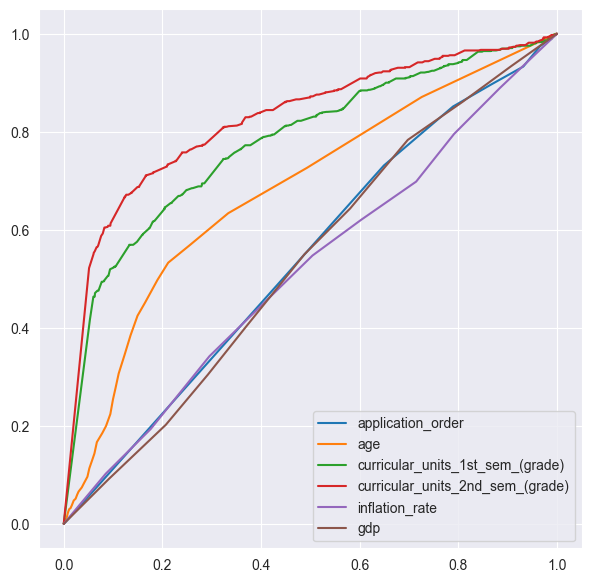

In [59]:
plt.figure(figsize=(7,7))
for c in numerical_short:
    auc = roc_auc_score(y_train, df_train[c])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[c])
        fpr, tpr, _ = roc_curve(y_train,-df_train[c])
        plt.plot(fpr, tpr, label=c)
    else:
        fpr, tpr, _ = roc_curve(y_train,df_train[c])
        plt.plot(fpr, tpr, label=c)
    #print('%16s, %.3f' % (c, auc))
plt.legend()


In [60]:
numerical_short

['application_order',
 'age',
 'curricular_units_1st_sem_(grade)',
 'curricular_units_2nd_sem_(grade)',
 'inflation_rate',
 'gdp']

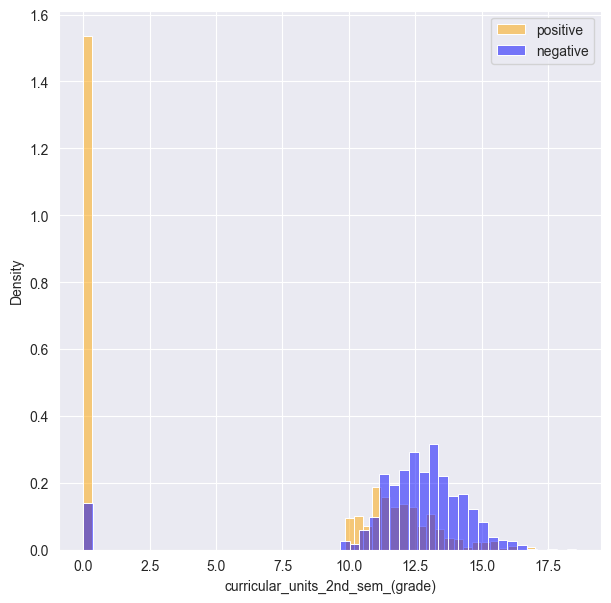

In [61]:
cat='curricular_units_2nd_sem_(grade)'
plt.figure(figsize=(7,7))
plt.clf()


sns.histplot(df_train[cat][y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train[cat][y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

In [62]:
data_numeric =data_main_sel_features[numerical]

In [63]:
data_numeric.describe()

,application_order,age,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),inflation_rate,gdp
count,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000,4424.000000
mean,1.727848,23.265145,0.709991,6.270570,8.299051,4.706600,10.640822,0.137658,0.541817,6.232143,8.063291,4.435805,10.230206,0.150316,1.228029,0.001969
std,1.313793,7.587816,2.360507,2.480178,4.179106,3.094238,4.843663,0.690880,1.918546,2.195951,3.947951,3.014764,5.210808,0.753774,1.382711,2.269935
min,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.800000,-4.060000
25%,1.000000,19.000000,0.000000,5.000000,6.000000,3.000000,11.000000,0.000000,0.000000,5.000000,6.000000,2.000000,10.750000,0.000000,0.300000,-1.700000
50%,1.000000,20.000000,0.000000,6.000000,8.000000,5.000000,12.285714,0.000000,0.000000,6.000000,8.000000,5.000000,12.200000,0.000000,1.400000,0.320000
75%,2.000000,25.000000,0.000000,7.000000,10.000000,6.000000,13.400000,0.000000,0.000000,7.000000,10.000000,6.000000,13.333333,0.000000,2.600000,1.790000
max,9.000000,70.000000,20.000000,26.000000,45.000000,26.000000,18.875000,12.000000,19.000000,23.000000,33.000000,20.000000,18.571429,12.000000,3.700000,3.510000


In [64]:
data_numeric.corr()

,application_order,age,curricular_units_1st_sem_(credited),curricular_units_1st_sem_(enrolled),curricular_units_1st_sem_(evaluations),curricular_units_1st_sem_(approved),curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),inflation_rate,gdp
application_order,1.000000,-0.271154,-0.133354,-0.016808,-0.092156,0.035580,0.058308,-0.031699,-0.125815,0.028878,-0.055089,0.071793,0.055517,-0.015757,-0.011133,0.030201
age,-0.271154,1.000000,0.226837,0.141327,0.139911,-0.053405,-0.156616,0.057470,0.207561,0.085914,0.056286,-0.112052,-0.173419,0.061654,0.025377,-0.064678
curricular_units_1st_sem_(credited),-0.133354,0.226837,1.000000,0.774344,0.542919,0.628394,0.122978,0.116262,0.944811,0.644826,0.427845,0.490478,0.132971,0.055256,0.023348,-0.026513
curricular_units_1st_sem_(enrolled),-0.016808,0.141327,0.774344,1.000000,0.680220,0.769083,0.376996,0.129337,0.753747,0.942627,0.599567,0.673341,0.361959,0.069547,0.036758,-0.026262
curricular_units_1st_sem_(evaluations),-0.092156,0.139911,0.542919,0.680220,1.000000,0.522396,0.418038,0.241800,0.522187,0.611842,0.778863,0.442265,0.355036,0.134296,-0.006604,-0.099761
curricular_units_1st_sem_(approved),0.035580,-0.053405,0.628394,0.769083,0.522396,1.000000,0.696113,-0.013360,0.607661,0.733772,0.539934,0.904002,0.685560,-0.053983,-0.007114,0.018459
curricular_units_1st_sem_(grade),0.058308,-0.156616,0.122978,0.376996,0.418038,0.696113,1.000000,-0.071660,0.113937,0.406167,0.487236,0.673335,0.837170,-0.066076,-0.033904,0.054801
curricular_units_1st_sem_(without_evaluations),-0.031699,0.057470,0.116262,0.129337,0.241800,-0.013360,-0.071660,1.000000,0.117359,0.109924,0.144683,-0.013070,-0.061482,0.583261,-0.052534,-0.144673
curricular_units_2nd_sem_(credited),-0.125815,0.207561,0.944811,0.753747,0.522187,0.607661,0.113937,0.117359,1.000000,0.676258,0.430978,0.519081,0.129770,0.070148,0.014490,-0.024491
curricular_units_2nd_sem_(enrolled),0.028878,0.085914,0.644826,0.942627,0.611842,0.733772,0.406167,0.109924,0.676258,1.000000,0.604821,0.703258,0.395135,0.067697,0.016844,-0.007592


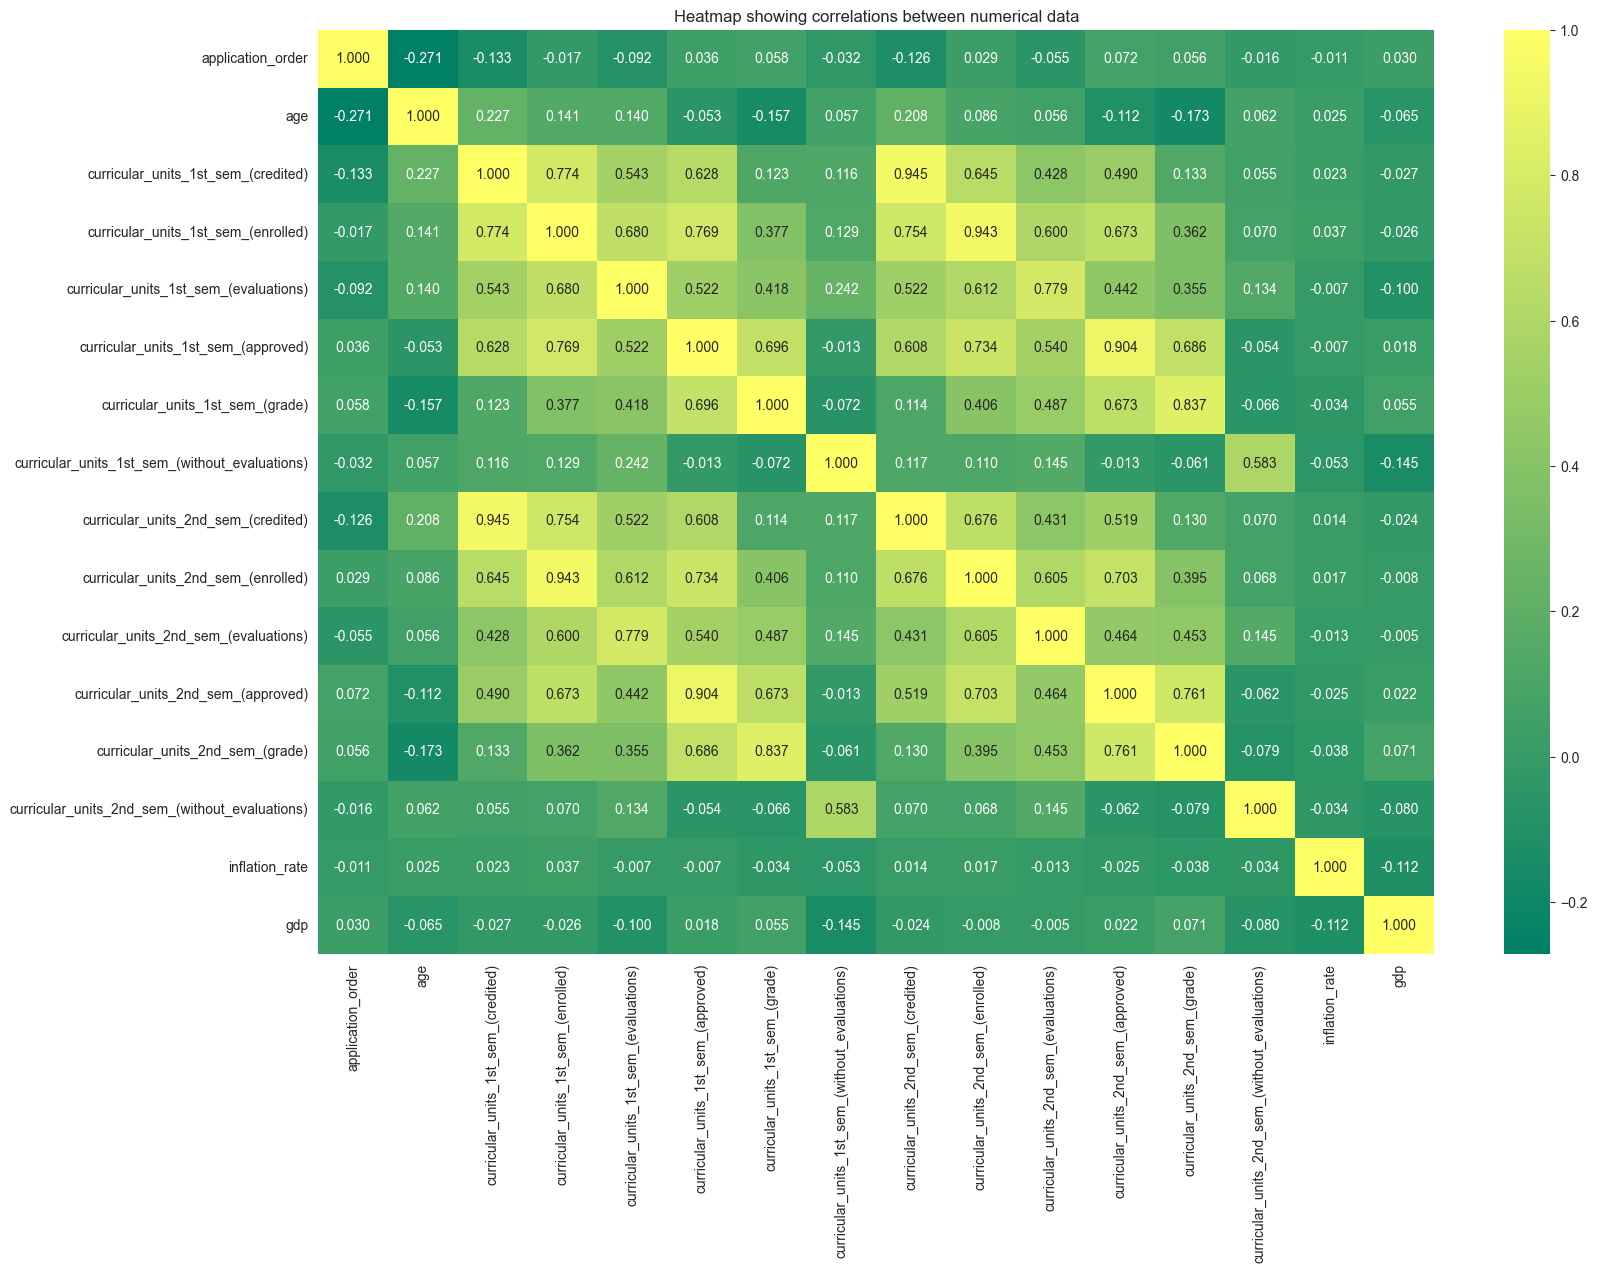

In [65]:
plt.figure(figsize=(18, 12))
sns.heatmap(data_numeric.corr(), cmap="summer", annot=True, fmt='.3f')
plt.title('Heatmap showing correlations between numerical data')
plt.show();

In [66]:
data_numeric.corr().unstack().sort_values(ascending = False)

application_order                               application_order                                 1.000000
age                                             age                                               1.000000
inflation_rate                                  inflation_rate                                    1.000000
curricular_units_2nd_sem_(without_evaluations)  curricular_units_2nd_sem_(without_evaluations)    1.000000
curricular_units_2nd_sem_(grade)                curricular_units_2nd_sem_(grade)                  1.000000
                                                                                                    ...   
age                                             curricular_units_1st_sem_(grade)                 -0.156616
curricular_units_2nd_sem_(grade)                age                                              -0.173419
age                                             curricular_units_2nd_sem_(grade)                 -0.173419
application_order                    

# One-hot encoding

In [67]:
from sklearn.feature_extraction import DictVectorizer

In [68]:
dict_train=df_train[categorical+numerical].to_dict(orient='records')
dict_val=df_val[categorical+numerical].to_dict(orient='records')
dict_test=df_test[categorical+numerical].to_dict(orient='records')

In [69]:
dv=DictVectorizer(sparse=True)

In [70]:
dv.fit(dict_train)

DictVectorizer()

In [71]:
dv.get_feature_names_out()

array(['age', 'application_mode=1st phase-general contingent',
       'application_mode=1st phase-special contingent (Azores Island)',
       'application_mode=1st phase-special contingent (Madeira Island)',
       'application_mode=2nd phase-general contingent',
       'application_mode=3rd phase-general contingent',
       'application_mode=Change in course',
       'application_mode=Change in institution/course',
       'application_mode=Holders of other higher courses',
       'application_mode=International student (bachelor)',
       'application_mode=Ordinance No. 533-A/99, item b3 (Other Institution)',
       'application_mode=Ordinance No. 612/93',
       'application_mode=Ordinance No. 854-B/99',
       'application_mode=Over 23 years old',
       'application_mode=Short cycle diploma holders',
       'application_mode=Technological specialization diploma holders',
       'application_mode=Transfer', 'application_order',
       'course=Advertising and Marketing Management', '

In [72]:
X_train=dv.transform(dict_train)
X_val=dv.transform(dict_val)
X_test=dv.transform(dict_test)

In [73]:
X_train.shape

(2654, 212)

# Training different models

## Training logistic regression

In [74]:
from sklearn.linear_model import LogisticRegression

In [75]:
C=0.1

In [76]:
model = LogisticRegression(solver='liblinear', random_state=SEED, C=C)
model.fit(X_train, y_train)

LogisticRegression(C=0.1, random_state=42, solver='liblinear')

In [77]:
y_pred = model.predict_proba(X_val)[:,1]

In [78]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [79]:

accuracy_score(y_val, y_pred >= 0.5)


0.8745762711864407

In [80]:
roc_auc_score(y_val, y_pred >= 0.5)

0.8357183945153375

### Model parameters Hyper-tuning

In [81]:
C_vals=[0.00001,0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,1,2,5,10,100]
for C in C_vals:
    model = LogisticRegression(solver='liblinear', random_state=SEED, C=C)
    model.fit(X_train, y_train)
    y_pred = model.predict_proba(X_val)[:, 1]
    print(f'c={C}, accuracy_score={accuracy_score(y_val, y_pred >= 0.5)}, auc={roc_auc_score(y_val, y_pred >= 0.5)}')


c=1e-05, accuracy_score=0.768361581920904, auc=0.657469800312269
c=0.0001, accuracy_score=0.8192090395480226, auc=0.7425924186750877
c=0.001, accuracy_score=0.8429378531073446, auc=0.785312210182783
c=0.01, accuracy_score=0.8621468926553673, auc=0.8153475458718289
c=0.05, accuracy_score=0.8723163841807909, auc=0.8303123862742565
c=0.1, accuracy_score=0.8745762711864407, auc=0.8357183945153375
c=0.2, accuracy_score=0.8734463276836159, auc=0.8348878297312843
c=0.3, accuracy_score=0.8711864406779661, auc=0.833226700163178
c=0.4, accuracy_score=0.8711864406779661, auc=0.8341629198314218
c=0.5, accuracy_score=0.8711864406779661, auc=0.8341629198314218
c=0.6, accuracy_score=0.8711864406779661, auc=0.8341629198314218
c=0.7, accuracy_score=0.8700564971751412, auc=0.8333323550473686
c=1, accuracy_score=0.8700564971751412, auc=0.8333323550473686
c=2, accuracy_score=0.8711864406779661, auc=0.8369715788361527
c=5, accuracy_score=0.8655367231638418, auc=0.8290738762429122
c=10, accuracy_score=0.863

In [82]:
C_best=0.4

In [83]:
model_log = LogisticRegression(solver='liblinear', random_state=SEED, C=C_best)
model_log.fit(X_train, y_train)

LogisticRegression(C=0.4, random_state=42, solver='liblinear')

In [84]:
y_pred = model_log.predict_proba(X_val)[:,1]

In [85]:
def tpr_fpr_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        tp = ((y_pred >= t) & (y_val == 1)).sum()
        fp = ((y_pred >= t) & (y_val == 0)).sum()
        fn = ((y_pred < t) & (y_val == 1)).sum()
        tn = ((y_pred < t) & (y_val == 0)).sum()

        scores.append((t, tp, fp, fn, tn))

    df_scores = pd.DataFrame(scores)
    df_scores.columns = ['threshold', 'tp', 'fp', 'fn', 'tn']

    df_scores['tpr'] = df_scores.tp / (df_scores.tp + df_scores.fn)
    df_scores['fpr'] = df_scores.fp / (df_scores.fp + df_scores.tn)

    return df_scores

In [86]:
df_scores=tpr_fpr_dataframe(y_val,y_pred)


In [87]:
df_scores

,threshold,tp,fp,fn,tn,tpr,fpr
0,0.00,283,602,0,0,1.000000,1.000000
1,0.01,282,560,1,42,0.996466,0.930233
2,0.02,276,484,7,118,0.975265,0.803987
3,0.03,267,415,16,187,0.943463,0.689369
4,0.04,266,354,17,248,0.939929,0.588040
...,...,...,...,...,...,...,...
96,0.96,91,4,192,598,0.321555,0.006645
97,0.97,81,3,202,599,0.286219,0.004983
98,0.98,71,0,212,602,0.250883,0.000000
99,0.99,49,0,234,602,0.173145,0.000000


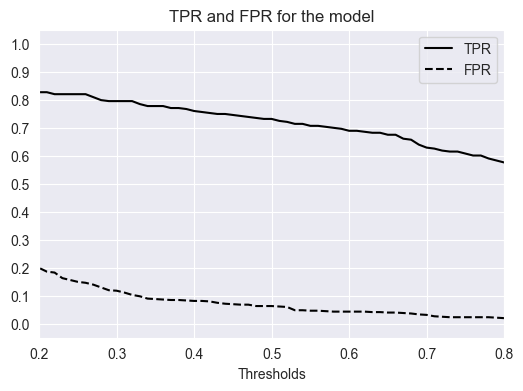

In [88]:
plt.figure(figsize=(6, 4))

plt.plot(df_scores.threshold, df_scores.tpr, color='black', linestyle='solid', label='TPR')
plt.plot(df_scores.threshold, df_scores.fpr, color='black', linestyle='dashed', label='FPR')
plt.legend()

plt.xticks(np.linspace(0, 1, 11))
plt.yticks(np.linspace(0, 1, 11))

plt.xlabel('Thresholds')
plt.title('TPR and FPR for the model')

plt.xlim(0.2,0.8)
#plt.savefig('04_fpr_tpr_plot_random.svg')

plt.show()

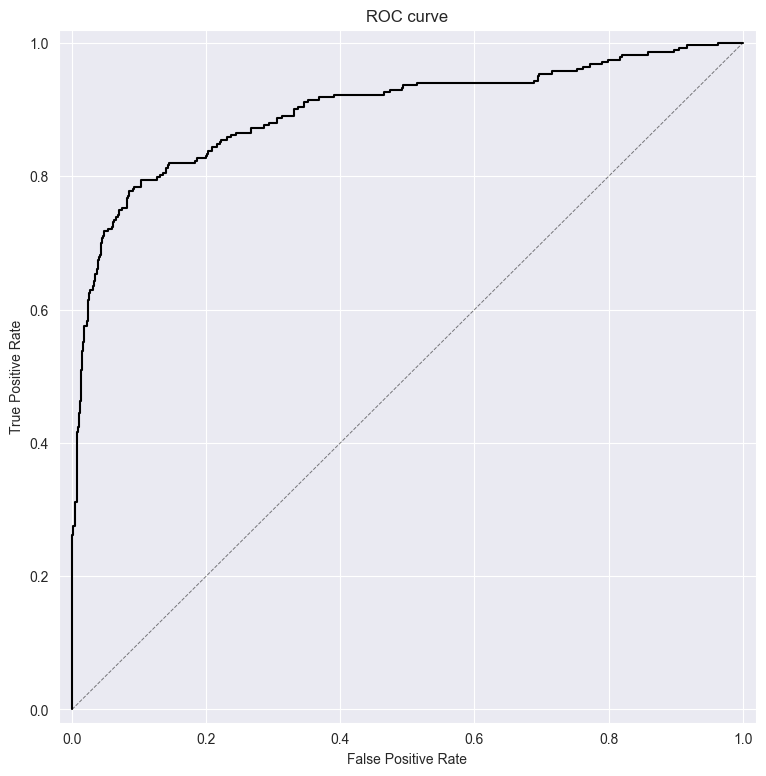

In [89]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred)
plt.figure(figsize=(9, 9))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

Ok there is a metrics for LogisticRegression

In [90]:
# results will store differnt models metrics
results=[]
print(f'LogisticRegression accuracy_score={accuracy_score(y_val, y_pred >= 0.5)}, auc={roc_auc_score(y_val, y_pred >= 0.5)}')
results.append(f'LogisticRegression accuracy_score={accuracy_score(y_val, y_pred >= 0.5)}, auc={roc_auc_score(y_val, y_pred >= 0.5)}')


LogisticRegression accuracy_score=0.8711864406779661, auc=0.8341629198314218



## Decision trees


In [91]:
from sklearn.tree import DecisionTreeClassifier

In [92]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

y_pred = dt.predict_proba(X_train)[:, 1]
roc_auc_score(y_train, y_pred)

1.0

In [93]:
for depth in [1, 2, 3, 4, 5, 6, 7,8,9,10,11, 15, 20, None]:
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%4s -> %.3f' % (depth, auc))

   1 -> 0.810
   2 -> 0.845
   3 -> 0.866
   4 -> 0.871
   5 -> 0.858
   6 -> 0.848
   7 -> 0.831
   8 -> 0.816
   9 -> 0.792
  10 -> 0.780
  11 -> 0.771
  15 -> 0.734
  20 -> 0.767
None -> 0.754


### Model parameters Hyper-tuning

In [94]:
for m in [4, 5, 6, 7,8]:
    print('depth: %s' % m)

    for s in [1, 5, 10, 12, 15, 17, 20, 50, 100, 200]:
        dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
        dt.fit(X_train, y_train)
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (s, auc))

    print()

depth: 4
1 -> 0.872
5 -> 0.871
10 -> 0.871
12 -> 0.872
15 -> 0.872
17 -> 0.872
20 -> 0.872
50 -> 0.872
100 -> 0.867
200 -> 0.862

depth: 5
1 -> 0.858
5 -> 0.863
10 -> 0.867
12 -> 0.868
15 -> 0.877
17 -> 0.876
20 -> 0.876
50 -> 0.876
100 -> 0.874
200 -> 0.862

depth: 6
1 -> 0.843
5 -> 0.868
10 -> 0.862
12 -> 0.861
15 -> 0.873
17 -> 0.870
20 -> 0.870
50 -> 0.876
100 -> 0.876
200 -> 0.862

depth: 7
1 -> 0.830
5 -> 0.863
10 -> 0.852
12 -> 0.862
15 -> 0.875
17 -> 0.872
20 -> 0.872
50 -> 0.874
100 -> 0.875
200 -> 0.862

depth: 8
1 -> 0.817
5 -> 0.850
10 -> 0.851
12 -> 0.855
15 -> 0.872
17 -> 0.864
20 -> 0.873
50 -> 0.874
100 -> 0.875
200 -> 0.862



In [95]:
#best values
max_depth=5
min_samples_leaf=15

In [96]:
dt = DecisionTreeClassifier(max_depth=m, min_samples_leaf=s)
dt.fit(X_train, y_train)
y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
accur=accuracy_score(y_val, y_pred>=0.5)

print( f'DecisionTree     accuracy_score={accur}, auc={auc}')

results.append(f'DecisionTree     accuracy_score={accur}, auc={auc}')


DecisionTree     accuracy_score=0.8418079096045198, auc=0.8620675486892926


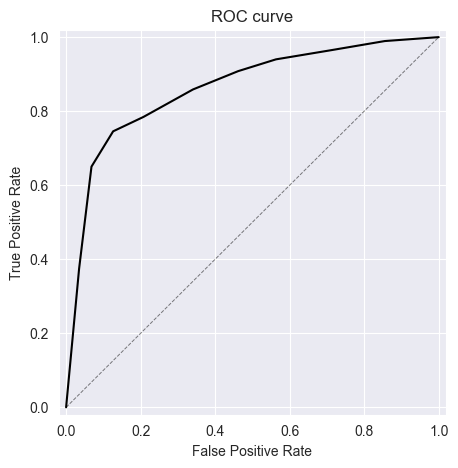

In [97]:
fpr, tpr, _ = roc_curve(y_val, y_pred)

plt.figure(figsize=(5, 5))

plt.plot(fpr, tpr, color='black')
plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

## Random forest

In [98]:
from sklearn.ensemble import RandomForestClassifier

In [99]:


rf = RandomForestClassifier(n_estimators=10, random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)

0.8848479156639236

### Model parameters Hyper-tuning

In [100]:
aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, random_state=SEED)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)

10 -> 0.885
20 -> 0.892
30 -> 0.894
40 -> 0.900
50 -> 0.901
60 -> 0.903
70 -> 0.904
80 -> 0.905
90 -> 0.907
100 -> 0.907
110 -> 0.909
120 -> 0.909
130 -> 0.910
140 -> 0.910
150 -> 0.910
160 -> 0.911
170 -> 0.911
180 -> 0.911
190 -> 0.911
200 -> 0.911


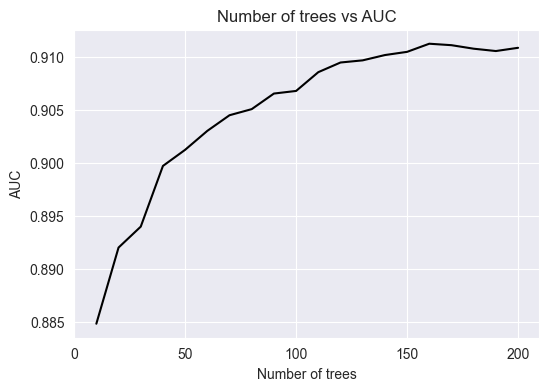

In [101]:
plt.figure(figsize=(6, 4))

plt.plot(range(10, 201, 10), aucs, color='black')
plt.xticks(range(0, 201, 50))

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators.svg')

plt.show()

In [102]:
all_aucs = {}

for depth in [10, 12,14,15]:
    print('depth: %s' % depth)
    aucs = []

    for i in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=i, max_depth=depth, random_state=SEED)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[depth] = aucs
    print()

depth: 10
10 -> 0.895
20 -> 0.899
30 -> 0.900
40 -> 0.902
50 -> 0.904
60 -> 0.904
70 -> 0.905
80 -> 0.905
90 -> 0.906
100 -> 0.906
110 -> 0.906
120 -> 0.906
130 -> 0.906
140 -> 0.906
150 -> 0.906
160 -> 0.906
170 -> 0.906
180 -> 0.905
190 -> 0.906
200 -> 0.906

depth: 12
10 -> 0.892
20 -> 0.902
30 -> 0.906
40 -> 0.906
50 -> 0.907
60 -> 0.907
70 -> 0.906
80 -> 0.906
90 -> 0.907
100 -> 0.906
110 -> 0.907
120 -> 0.908
130 -> 0.908
140 -> 0.908
150 -> 0.909
160 -> 0.909
170 -> 0.908
180 -> 0.908
190 -> 0.908
200 -> 0.908

depth: 14
10 -> 0.894
20 -> 0.889
30 -> 0.893
40 -> 0.893
50 -> 0.896
60 -> 0.898
70 -> 0.900
80 -> 0.901
90 -> 0.902
100 -> 0.902
110 -> 0.904
120 -> 0.904
130 -> 0.904
140 -> 0.905
150 -> 0.904
160 -> 0.905
170 -> 0.905
180 -> 0.904
190 -> 0.905
200 -> 0.906

depth: 15
10 -> 0.884
20 -> 0.892
30 -> 0.897
40 -> 0.899
50 -> 0.903
60 -> 0.904
70 -> 0.904
80 -> 0.903
90 -> 0.904
100 -> 0.905
110 -> 0.906
120 -> 0.905
130 -> 0.906
140 -> 0.905
150 -> 0.905
160 -> 0.906
170 -

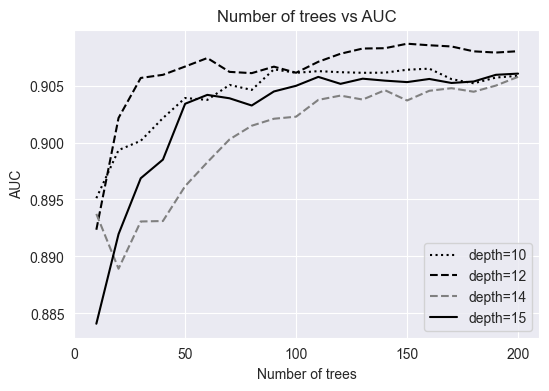

In [103]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 10))

plt.plot(num_trees, all_aucs[10], label='depth=10', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[12], label='depth=12', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[14], label='depth=14', color='gray', linestyle='dashed')
plt.plot(num_trees, all_aucs[15], label='depth=15', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_depth.svg')

plt.show()


In [104]:
all_aucs = {}

for m in [3, 5, 10, None]:
    print('min_samples_leaf: %s' % m)
    aucs = []

    for i in range(10, 201, 20):
        if m:
            rf = RandomForestClassifier(n_estimators=i, max_depth=15, min_samples_leaf=m, random_state=SEED)
        else:
            rf = RandomForestClassifier(n_estimators=i, max_depth=15, random_state=SEED)
        rf.fit(X_train, y_train)
        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
        print('%s -> %.3f' % (i, auc))
        aucs.append(auc)

    all_aucs[m] = aucs
    print()

min_samples_leaf: 3
10 -> 0.899
30 -> 0.902
50 -> 0.902
70 -> 0.905
90 -> 0.907
110 -> 0.907
130 -> 0.907
150 -> 0.907
170 -> 0.908
190 -> 0.908

min_samples_leaf: 5
10 -> 0.889
30 -> 0.896
50 -> 0.902
70 -> 0.902
90 -> 0.903
110 -> 0.903
130 -> 0.904
150 -> 0.903
170 -> 0.904
190 -> 0.904

min_samples_leaf: 10
10 -> 0.897
30 -> 0.905
50 -> 0.905
70 -> 0.905
90 -> 0.904
110 -> 0.904
130 -> 0.903
150 -> 0.903
170 -> 0.903
190 -> 0.903

min_samples_leaf: None
10 -> 0.884
30 -> 0.897
50 -> 0.903
70 -> 0.904
90 -> 0.904
110 -> 0.906
130 -> 0.906
150 -> 0.905
170 -> 0.905
190 -> 0.906



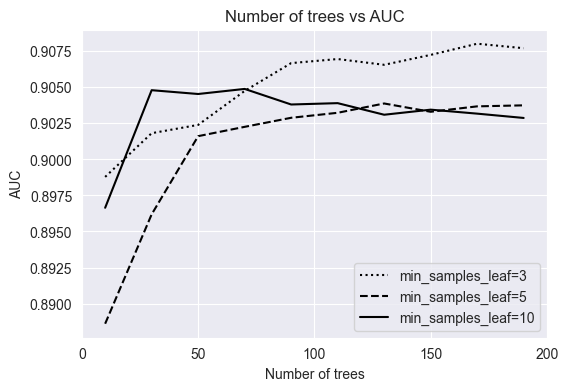

In [105]:
plt.figure(figsize=(6, 4))

num_trees = list(range(10, 201, 20))

plt.plot(num_trees, all_aucs[3], label='min_samples_leaf=3', color='black', linestyle='dotted')
plt.plot(num_trees, all_aucs[5], label='min_samples_leaf=5', color='black', linestyle='dashed')
plt.plot(num_trees, all_aucs[10], label='min_samples_leaf=10', color='black', linestyle='solid')

plt.xticks(range(0, 201, 50))
plt.legend()

plt.title('Number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_random_forest_n_estimators_sample_leaf.svg')

plt.show()

In [106]:
max_depth=15
min_samples_leaf=3

aucs = []

for i in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=i, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=SEED)
    rf.fit(X_train, y_train)
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
    print('%s -> %.3f' % (i, auc))
    aucs.append(auc)


10 -> 0.899
20 -> 0.900
30 -> 0.902
40 -> 0.902
50 -> 0.902
60 -> 0.904
70 -> 0.905
80 -> 0.906
90 -> 0.907
100 -> 0.907
110 -> 0.907
120 -> 0.907
130 -> 0.907
140 -> 0.907
150 -> 0.907
160 -> 0.908
170 -> 0.908
180 -> 0.908
190 -> 0.908
200 -> 0.908


In [107]:
n_estimators=180
max_depth=15
min_samples_leaf=3


rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=SEED)
rf.fit(X_train, y_train)
y_pred = rf.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)

print(f'RandomForest accuracy_score={accuracy_score(y_val,y_pred>=0.5)}, auc={auc}')
results.append(f'RandomForest accuracy_score={accuracy_score(y_val,y_pred>=0.5)}, auc={auc}')

RandomForest accuracy_score=0.8689265536723164, auc=0.9078161135437821


In [108]:
results

['LogisticRegression accuracy_score=0.8711864406779661, auc=0.8341629198314218',
 'DecisionTree     accuracy_score=0.8418079096045198, auc=0.8620675486892926',
 'RandomForest accuracy_score=0.8689265536723164, auc=0.9078161135437821']

## XGBoost

In [109]:
import xgboost as xgb

In [110]:
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=dv.feature_names_)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=dv.feature_names_)

In [111]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'nthread': 8,
    'seed': SEED
}

In [112]:
model = xgb.train(xgb_params, dtrain, num_boost_round=10)
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

0.9049722362443211

In [113]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

### Model parameters Hyper-tuning

In [114]:
xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1
}

In [115]:
model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=2)

[0]	train-auc:0.92568	val-auc:0.86827
[2]	train-auc:0.94538	val-auc:0.88672
[4]	train-auc:0.95399	val-auc:0.89751
[6]	train-auc:0.96208	val-auc:0.90294
[8]	train-auc:0.96990	val-auc:0.90674
[10]	train-auc:0.97308	val-auc:0.90477
[12]	train-auc:0.97708	val-auc:0.90092
[14]	train-auc:0.97933	val-auc:0.90097
[16]	train-auc:0.98345	val-auc:0.90132
[18]	train-auc:0.98570	val-auc:0.89842
[20]	train-auc:0.98696	val-auc:0.89765
[22]	train-auc:0.98832	val-auc:0.89666
[24]	train-auc:0.99009	val-auc:0.89624
[26]	train-auc:0.99058	val-auc:0.89650
[28]	train-auc:0.99173	val-auc:0.89617
[30]	train-auc:0.99224	val-auc:0.89675
[32]	train-auc:0.99372	val-auc:0.89843
[34]	train-auc:0.99476	val-auc:0.89843
[36]	train-auc:0.99528	val-auc:0.89772
[38]	train-auc:0.99591	val-auc:0.89707
[40]	train-auc:0.99619	val-auc:0.89624
[42]	train-auc:0.99679	val-auc:0.89621
[44]	train-auc:0.99746	val-auc:0.89472
[46]	train-auc:0.99817	val-auc:0.89504
[48]	train-auc:0.99830	val-auc:0.89538
[50]	train-auc:0.99841	val-auc

In [116]:
%%capture output

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=100,
                  evals=watchlist, verbose_eval=5)

In [117]:
print(output.stdout)

[0]	train-auc:0.92568	val-auc:0.86827
[5]	train-auc:0.95950	val-auc:0.90355
[10]	train-auc:0.97308	val-auc:0.90477
[15]	train-auc:0.98103	val-auc:0.89904
[20]	train-auc:0.98696	val-auc:0.89765
[25]	train-auc:0.99047	val-auc:0.89635
[30]	train-auc:0.99224	val-auc:0.89675
[35]	train-auc:0.99510	val-auc:0.89765
[40]	train-auc:0.99619	val-auc:0.89624
[45]	train-auc:0.99780	val-auc:0.89479
[50]	train-auc:0.99841	val-auc:0.89495
[55]	train-auc:0.99901	val-auc:0.89557
[60]	train-auc:0.99938	val-auc:0.89682
[65]	train-auc:0.99952	val-auc:0.89689
[70]	train-auc:0.99975	val-auc:0.89855
[75]	train-auc:0.99985	val-auc:0.89814
[80]	train-auc:0.99990	val-auc:0.89707
[85]	train-auc:0.99994	val-auc:0.89777
[90]	train-auc:0.99997	val-auc:0.89774
[95]	train-auc:0.99999	val-auc:0.89888
[99]	train-auc:0.99999	val-auc:0.89965



In [118]:
def parse_xgb_output(output):
    tree = []
    aucs_train = []
    aucs_val = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        tree.append(it)
        aucs_train.append(train)
        aucs_val.append(val)

    return tree, aucs_train, aucs_val

In [119]:
tree, aucs_train, aucs_val = parse_xgb_output(output)

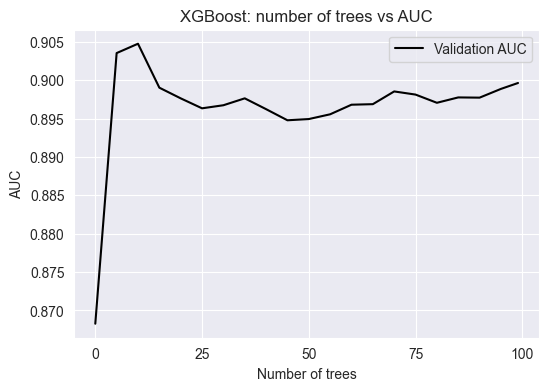

In [120]:
plt.figure(figsize=(6, 4))

# plt.plot(tree, aucs_train, color='black', linestyle='dashed', label='Train AUC')
plt.plot(tree, aucs_val, color='black', linestyle='solid', label='Validation AUC')
plt.xticks(range(0, 101, 25))

plt.legend()

plt.title('XGBoost: number of trees vs AUC')
plt.xlabel('Number of trees')
plt.ylabel('AUC')

# plt.savefig('ch06-figures/06_xgb_default.svg')

plt.show()

In [121]:
%%capture output

xgb_params = {
    'eta': 0.3,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [122]:
tree, _, aucs_val_eta_03 = parse_xgb_output(output)
print(max(aucs_val_eta_03))
print(max(zip(aucs_val_eta_03, tree)))

0.90477
(0.90477, 10)


In [123]:
%%capture output

xgb_params = {
    'eta': 0.1,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [124]:
tree, _, aucs_val_eta_01 = parse_xgb_output(output)
print(max(aucs_val_eta_01))
print(max(zip(aucs_val_eta_01, tree)))

0.90622
(0.90622, 30)


In [125]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [126]:
tree, _, aucs_val_eta_005 = parse_xgb_output(output)
print(max(aucs_val_eta_005))
print(max(zip(aucs_val_eta_005, tree)))

0.90687
(0.90687, 60)


In [127]:
%%capture output

xgb_params = {
    'eta': 0.01,
    'max_depth': 6,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [128]:
tree, _, aucs_val_eta_001 = parse_xgb_output(output)
print(max(aucs_val_eta_001))
print(max(zip(aucs_val_eta_001, tree)))

0.90783
(0.90783, 300)


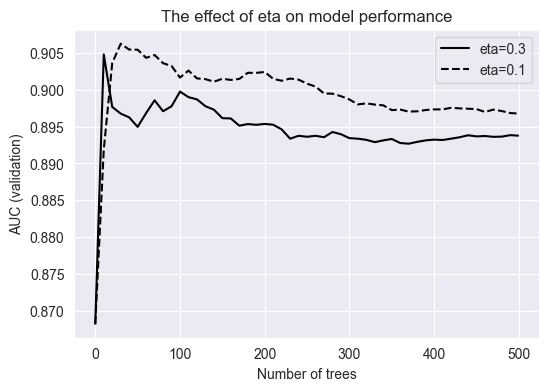

In [129]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_03, color='black', linestyle='solid', label='eta=0.3')
plt.plot(tree, aucs_val_eta_01, color='black', linestyle='dashed', label='eta=0.1')
# plt.plot(tree, aucs_val_eta_005, color='grey', linestyle='solid', label='eta=0.05')
# plt.plot(tree, aucs_val_eta_001, color='grey', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta.svg')

plt.show()

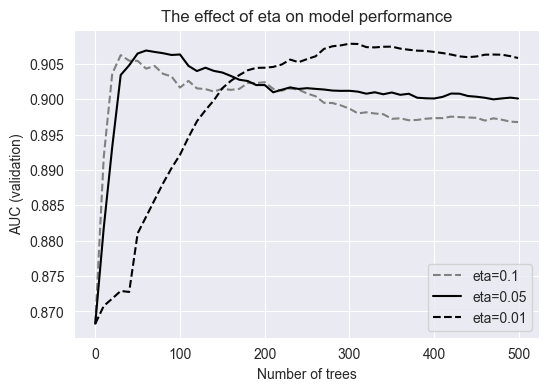

In [130]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val_eta_01, color='grey', linestyle='dashed', label='eta=0.1')
plt.plot(tree, aucs_val_eta_005, color='black', linestyle='solid', label='eta=0.05')
plt.plot(tree, aucs_val_eta_001, color='black', linestyle='dashed', label='eta=0.01')

plt.xticks(range(0, 501, 100))

plt.legend()

plt.title('The effect of eta on model performance')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_eta_2.svg')

plt.show()

best eta=0.0.5

### Parameter tuning: max_depth

Tried different from 3 to 20 -> 15 gives the best

In [131]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': SEED,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [132]:
tree, _, aucs_val_depth3 = parse_xgb_output(output)
print(max(aucs_val_depth3))
print(max(zip(aucs_val_depth3, tree)))

0.90594
(0.90594, 70)


### Tune "min_child_weight"

1 gives the best


In [133]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': SEED,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [134]:
tree, _, aucs_val_mcw1 = parse_xgb_output(output)
print(max(aucs_val_mcw1))
print(max(zip(aucs_val_mcw1, tree)))

0.90594
(0.90594, 70)


## Checking the best number of trees

In [135]:
%%capture output

xgb_params = {
    'eta': 0.05,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=500, verbose_eval=10,
                  evals=watchlist)

In [136]:
print(output)

[0]	train-auc:0.95950	val-auc:0.86110
[10]	train-auc:0.97868	val-auc:0.88651
[20]	train-auc:0.98618	val-auc:0.89225
[30]	train-auc:0.99179	val-auc:0.89773
[40]	train-auc:0.99528	val-auc:0.90233
[50]	train-auc:0.99749	val-auc:0.90465
[60]	train-auc:0.99874	val-auc:0.90583
[70]	train-auc:0.99944	val-auc:0.90594
[80]	train-auc:0.99974	val-auc:0.90545
[90]	train-auc:0.99987	val-auc:0.90511
[100]	train-auc:0.99994	val-auc:0.90420
[110]	train-auc:0.99998	val-auc:0.90365
[120]	train-auc:0.99999	val-auc:0.90314
[130]	train-auc:1.00000	val-auc:0.90241
[140]	train-auc:1.00000	val-auc:0.90217
[150]	train-auc:1.00000	val-auc:0.90239
[160]	train-auc:1.00000	val-auc:0.90206
[170]	train-auc:1.00000	val-auc:0.90138
[180]	train-auc:1.00000	val-auc:0.90110
[190]	train-auc:1.00000	val-auc:0.90099
[200]	train-auc:1.00000	val-auc:0.90079
[210]	train-auc:1.00000	val-auc:0.90068
[220]	train-auc:1.00000	val-auc:0.90073
[230]	train-auc:1.00000	val-auc:0.90030
[240]	train-auc:1.00000	val-auc:0.89986
[250]	train

In [137]:
tree, _, aucs_val = parse_xgb_output(output)
print(max(aucs_val))

0.90594


In [138]:
max(zip(aucs_val, tree))

(0.90594, 70)

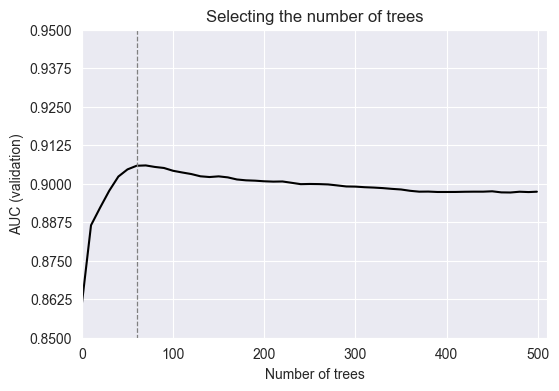

In [139]:
plt.figure(figsize=(6, 4))

plt.plot(tree, aucs_val, color='black', linestyle='solid')


plt.ylim(0.85, 0.95)
plt.xlim(0, 510)
plt.xticks(range(0, 501, 100))
plt.yticks(np.linspace(0.85, 0.95, 9))


plt.vlines(60, 0, 1, color='grey', linestyle='dashed', linewidth=0.9)

plt.title('Selecting the number of trees')
plt.xlabel('Number of trees')
plt.ylabel('AUC (validation)')

# plt.savefig('ch06-figures/06_xgb_number_trees.svg')

plt.show()

### final XGBoost model best parameters

In [140]:
xgb_params = {
    'eta': 0.05,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': 1,
}

model = xgb.train(xgb_params, dtrain,
                  num_boost_round=60, verbose_eval=10,
                  evals=watchlist)

[0]	train-auc:0.95950	val-auc:0.86110
[10]	train-auc:0.97868	val-auc:0.88651
[20]	train-auc:0.98618	val-auc:0.89225
[30]	train-auc:0.99179	val-auc:0.89773
[40]	train-auc:0.99528	val-auc:0.90233
[50]	train-auc:0.99749	val-auc:0.90465
[59]	train-auc:0.99865	val-auc:0.90585


In [141]:
y_pred_xgb = model.predict(dval)

In [142]:
roc_auc_score(y_val, y_pred_xgb)

0.9058497587546812

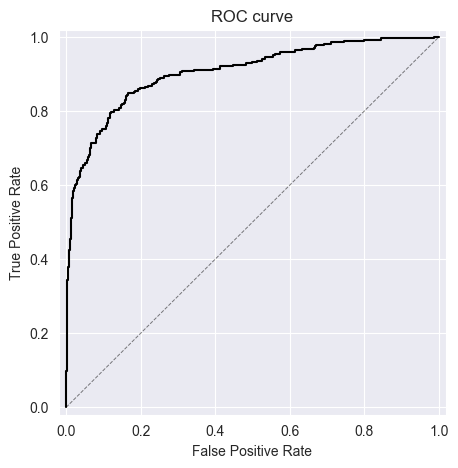

In [144]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_val, y_pred_xgb)
plt.plot(fpr, tpr, color='black')


plt.plot([0, 1], [0, 1], color='black', lw=0.7, linestyle='dashed', alpha=0.5)

plt.xlim([-0.02, 1.02])
plt.ylim([-0.02, 1.02])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC curve')

plt.show()

In [145]:

print(f'XGBoost accuracy_score={accuracy_score(y_val, y_pred_xgb >= 0.5)}, auc={roc_auc_score(y_val, y_pred_xgb)}')
results.append(f'XGBoost accuracy_score={accuracy_score(y_val, y_pred_xgb >= 0.5)}, auc={roc_auc_score(y_val, y_pred_xgb)}')


XGBoost accuracy_score=0.8542372881355932, auc=0.9058497587546812


In [146]:
results

['LogisticRegression accuracy_score=0.8711864406779661, auc=0.8341629198314218',
 'DecisionTree     accuracy_score=0.8418079096045198, auc=0.8620675486892926',
 'RandomForest accuracy_score=0.8689265536723164, auc=0.9078161135437821',
 'XGBoost accuracy_score=0.8542372881355932, auc=0.9058497587546812']

## Final test

In [147]:
df_train_full_copy=df_train_full.copy()
y_train_full = (df_train_full_copy.dropout == 1).values
# y_test = (df_test.status == 'default').values

del df_train_full_copy['dropout']
# del df_test['status']

In [148]:
dict_train_full = df_train_full_copy.to_dict(orient='records')
dict_test = df_test.to_dict(orient='records')

dv = DictVectorizer(sparse=True)
X_train_full = dv.fit_transform(dict_train_full)
X_test = dv.transform(dict_test)

In [149]:
X_train_full.shape

(3539, 223)

In [150]:
X_test.shape

(885, 223)

In [151]:
n_estimators=180
max_depth=15
min_samples_leaf=3


rf_final = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, min_samples_leaf=min_samples_leaf, random_state=SEED)

rf_final.fit(X_train_full, y_train_full)

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=180,
                       random_state=42)

In [152]:
y_pred_rf = rf_final.predict_proba(X_test)[:, 1]

In [153]:
dtrain_full = xgb.DMatrix(X_train_full, label=y_train_full, feature_names=dv.feature_names_)
dtest = xgb.DMatrix(X_test, label=y_test, feature_names=dv.feature_names_)

xgb_params = {
    'eta': 0.05,
    'max_depth': 15,
    'min_child_weight': 1,

    'objective': 'binary:logistic',
    'eval_metric': 'auc',
    'nthread': 8,
    'seed': SEED,
}

num_trees = 60

xgb_final = xgb.train(xgb_params, dtrain_full, num_boost_round=num_trees)

In [154]:
y_pred_xgb = xgb_final.predict(dtest)

In [155]:
print(f'Random Forest, accuracy={accuracy_score(y_test, y_pred_rf>=0.5)}, auc={roc_auc_score(y_test, y_pred_rf)}')
print(f'XGBoost, accuracy={accuracy_score(y_test, y_pred_xgb>=0.5)}, auc={roc_auc_score(y_test, y_pred_xgb)}')

Random Forest, accuracy=0.8531073446327684, auc=0.9099074547840983
XGBoost, accuracy=0.8497175141242937, auc=0.899493337189384


In [156]:
## Final test

RANDOM FOREST wins!


In [157]:
rf_final

RandomForestClassifier(max_depth=15, min_samples_leaf=3, n_estimators=180,
                       random_state=42)

In [158]:
dv

DictVectorizer()

In [159]:
dv.get_feature_names_out()

array(['age', 'application_mode=1st phase-general contingent',
       'application_mode=1st phase-special contingent (Azores Island)',
       'application_mode=1st phase-special contingent (Madeira Island)',
       'application_mode=2nd phase-general contingent',
       'application_mode=3rd phase-general contingent',
       'application_mode=Change in course',
       'application_mode=Change in institution/course',
       'application_mode=Change in institution/course (International)',
       'application_mode=Holders of other higher courses',
       'application_mode=International student (bachelor)',
       'application_mode=Ordinance No. 533-A/99, item b2) (Different Plan)',
       'application_mode=Ordinance No. 533-A/99, item b3 (Other Institution)',
       'application_mode=Ordinance No. 612/93',
       'application_mode=Ordinance No. 854-B/99',
       'application_mode=Over 23 years old',
       'application_mode=Short cycle diploma holders',
       'application_mode=Technologi

In [161]:
df_test

,marital_status,application_mode,application_order,course,daytime_or_evening_attendance,previous_qualification,mother_qualification,father_qualification,mother_occupation,father_occupation,...,curricular_units_1st_sem_(grade),curricular_units_1st_sem_(without_evaluations),curricular_units_2nd_sem_(credited),curricular_units_2nd_sem_(enrolled),curricular_units_2nd_sem_(evaluations),curricular_units_2nd_sem_(approved),curricular_units_2nd_sem_(grade),curricular_units_2nd_sem_(without_evaluations),inflation_rate,gdp
1255,Divorced,Over 23 years old,1,Equiniculture,daytime,Secondary education,Higher Education-degree,Secondary Education-12th Year of Schooling or ...,"Personal Services, Security and Safety Workers...","Personal Services, Security and Safety Workers...",...,0.000000,0,0,6,16,1,10.000000,0,0.6,2.02
3458,Single,2nd phase-general contingent,1,Social Service,daytime,Secondary education,Higher Education-master’s degree,Higher Education-degree,Representatives of the Legislative Power and E...,Representatives of the Legislative Power and E...,...,11.571429,0,0,6,8,6,12.142857,0,0.3,-0.92
3390,Single,2nd phase-general contingent,1,Basic Education,daytime,Secondary education,Supplementary Accounting and Administration,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,...,12.714286,0,0,7,7,7,12.285714,0,0.3,-0.92
1497,Single,2nd phase-general contingent,2,Advertising and Marketing Management,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Secondary Education-12th Year of Schooling or ...,Administrative staff,Armed Forces Professions,...,13.857143,0,0,6,8,5,13.000000,0,2.8,-4.06
1536,Single,Over 23 years old,1,Nursing,daytime,Secondary education,General Course of Administration and Commerce,Basic Education 3rd Cycle (9th/10th/11th Year)...,Unskilled Workers,Installation and Machine Operators and Assembl...,...,0.000000,0,0,7,14,0,0.000000,0,0.6,2.02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3162,Single,1st phase-general contingent,4,Nursing,daytime,Secondary education,General commerce course,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,...,14.328571,0,0,8,8,7,14.328571,0,1.4,1.74
3281,Married,Holders of other higher courses,1,Social Service (evening attendance),evening,Higher education-degree,9th Year of Schooling-not completed,Cannot read or write,Other Situation,Other Situation,...,13.333333,0,8,8,8,8,12.875000,0,1.4,1.74
436,Single,2nd phase-general contingent,1,Tourism,daytime,Secondary education,General commerce course,Basic Education 3rd Cycle (9th/10th/11th Year)...,"Personal Services, Security and Safety Workers...","Personal Services, Security and Safety Workers...",...,11.250000,0,0,6,6,6,10.500000,0,0.5,1.79
1434,Single,1st phase-general contingent,2,Nursing,daytime,Secondary education,Secondary Education-12th Year of Schooling or ...,Basic Education 2nd Cycle (6th/7th/8th Year) o...,Unskilled Workers,Unskilled Workers,...,12.816667,0,0,8,11,6,12.875000,0,0.6,2.02


In [162]:
df_test.columns

Index(['marital_status', 'application_mode', 'application_order', 'course',
       'daytime_or_evening_attendance', 'previous_qualification',
       'mother_qualification', 'father_qualification', 'mother_occupation',
       'father_occupation', 'displaced', 'debtor', 'tuition_fees_up_to_date',
       'gender', 'scholarship_holder', 'age',
       'curricular_units_1st_sem_(credited)',
       'curricular_units_1st_sem_(enrolled)',
       'curricular_units_1st_sem_(evaluations)',
       'curricular_units_1st_sem_(approved)',
       'curricular_units_1st_sem_(grade)',
       'curricular_units_1st_sem_(without_evaluations)',
       'curricular_units_2nd_sem_(credited)',
       'curricular_units_2nd_sem_(enrolled)',
       'curricular_units_2nd_sem_(evaluations)',
       'curricular_units_2nd_sem_(approved)',
       'curricular_units_2nd_sem_(grade)',
       'curricular_units_2nd_sem_(without_evaluations)', 'inflation_rate',
       'gdp'],
      dtype='object')


## working script for preparation, training and saving the model and dictVectorizer to bin is: train.py


### For predict testing
i will extract some students from df_test


In [165]:
df_test.reset_index

<bound method DataFrame.reset_index of      marital_status                 application_mode  application_order  \
1255       Divorced                Over 23 years old                  1   
3458         Single     2nd phase-general contingent                  1   
3390         Single     2nd phase-general contingent                  1   
1497         Single     2nd phase-general contingent                  2   
1536         Single                Over 23 years old                  1   
...             ...                              ...                ...   
3162         Single     1st phase-general contingent                  4   
3281        Married  Holders of other higher courses                  1   
436          Single     2nd phase-general contingent                  1   
1434         Single     1st phase-general contingent                  2   
1361         Single     1st phase-general contingent                  4   

                                    course daytime_or_evenin

In [194]:
student_num=72

In [196]:
df_test.iloc[student_num].to_dict()

{'marital_status': 'Single',
 'application_mode': '2nd phase-general contingent',
 'application_order': 2,
 'course': 'Journalism and Communication',
 'daytime_or_evening_attendance': 'daytime',
 'previous_qualification': 'Secondary education',
 'mother_qualification': 'Secondary Education-12th Year of Schooling or Equivalent',
 'father_qualification': 'Secondary Education-12th Year of Schooling or Equivalent',
 'mother_occupation': 'Intermediate Level Technicians and Professions',
 'father_occupation': 'Intermediate Level Technicians and Professions',
 'displaced': 'yes',
 'debtor': 'no',
 'tuition_fees_up_to_date': 'yes',
 'gender': 'female',
 'scholarship_holder': 'no',
 'age': 18,
 'curricular_units_1st_sem_(credited)': 0,
 'curricular_units_1st_sem_(enrolled)': 6,
 'curricular_units_1st_sem_(evaluations)': 0,
 'curricular_units_1st_sem_(approved)': 0,
 'curricular_units_1st_sem_(grade)': 0.0,
 'curricular_units_1st_sem_(without_evaluations)': 0,
 'curricular_units_2nd_sem_(credite

In [195]:
y_test[student_num]

1